# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu
- **Email:** wahyuwinanta24@gmail.com
- **ID Dicoding:** wahyuu24

## Menentukan Pertanyaan Bisnis

*   Pertanyaan 1 : Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
*   Pertanyaan 2 : Apa dampak musiman terhadap penyewaan sepeda?
*   Pertanyaan 3 : Bagaimana perbandingan antara pengguna terdaftar dan pengguna kasual dalam penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada langkah ini, kita akan mengumpulkan dan memuat dataset yang akan digunakan untuk analisis. Dataset yang digunakan adalah `hour.csv`, yang berisi informasi tentang penyewaan sepeda berdasarkan waktu. Kita akan memuat dataset ini menggunakan pandas dan melakukan beberapa pemeriksaan awal untuk memahami struktur data.

In [29]:
df_hour = pd.read_csv('hour.csv')

print("First 5 rows of the dataset:")
print(df_hour.head())
print("\nShape of the dataset:", df_hour.shape)
print("\nColumn names in the dataset:", df_hour.columns.tolist())


First 5 rows of the dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Shape of the dataset: (17379, 17)

Column names in the dataset: ['ins

### Assessing Data

Pada langkah ini, kita akan melakukan penilaian awal terhadap dataset yang telah dimuat. Penilaian ini meliputi pemeriksaan nilai yang hilang, statistik dasar, dan tipe data dari masing-masing kolom. Ini penting untuk memahami kualitas data dan siap untuk analisis lebih lanjut.

In [30]:
missing_values = df_hour.isnull().sum()
print("Missing Values:\n", missing_values)

statistics = df_hour.describe()
print("\nBasic Statistics:\n", statistics)
print("\nData Types:\n", df_hour.dtypes)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Basic Statistics:
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000   

**Insight:**

1. **Kualitas Data**: Tidak ada nilai yang hilang, sehingga data siap untuk analisis.
  
2. **Statistik Dasar**:
   - **Rata-rata Penyewaan**: Rata-rata penyewaan sepeda per jam adalah sekitar 189.
   - **Variasi Penyewaan**: Penyewaan menunjukkan variasi besar dengan standar deviasi 181, mengindikasikan adanya jam dengan penyewaan tinggi.
   - **Tipe Data**: Tipe data bervariasi antara `int64` dan `float64`, memungkinkan analisis numerik pada kolom-kolom tersebut.


### Cleaning Data

Pada tahap ini, kita memeriksa kembali apakah ada nilai yang hilang dalam dataset sebelum melakukan pembersihan data. Jika terdapat nilai yang hilang, kita dapat memilih salah satu dari dua opsi untuk menangani nilai tersebut

In [31]:
print("Missing Values Before Cleaning:\n", df_hour.isnull().sum())

numeric_cols = df_hour.select_dtypes(include=[np.number]).columns
df_hour_cleaned = df_hour.copy()
df_hour_cleaned[numeric_cols] = df_hour_cleaned[numeric_cols].fillna(df_hour_cleaned[numeric_cols].mean())

print("\nMissing Values After Cleaning:\n", df_hour_cleaned.isnull().sum())

print("\nFirst 5 rows of the cleaned dataset:")
print(df_hour_cleaned.head())


Missing Values Before Cleaning:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values After Cleaning:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

First 5 rows of the cleaned dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  20

**Insight:**

1. **Pemeriksaan Nilai Hilang**: Sebelum pembersihan, tidak ada nilai yang hilang dalam dataset, menunjukkan bahwa data sudah bersih dan siap digunakan.

2. **Pembersihan Data**: Proses pembersihan dilakukan dengan memeriksa dan mengisi nilai yang hilang menggunakan rata-rata untuk kolom numerik, meskipun tidak ada nilai yang perlu diisi dalam kasus ini.

3. **Data Setelah Pembersihan**: Dataset tetap utuh dengan semua nilai yang ada, dan hasil pembersihan menunjukkan bahwa tidak ada perubahan pada jumlah nilai yang hilang.


## Exploratory Data Analysis (EDA)

### Explore ...

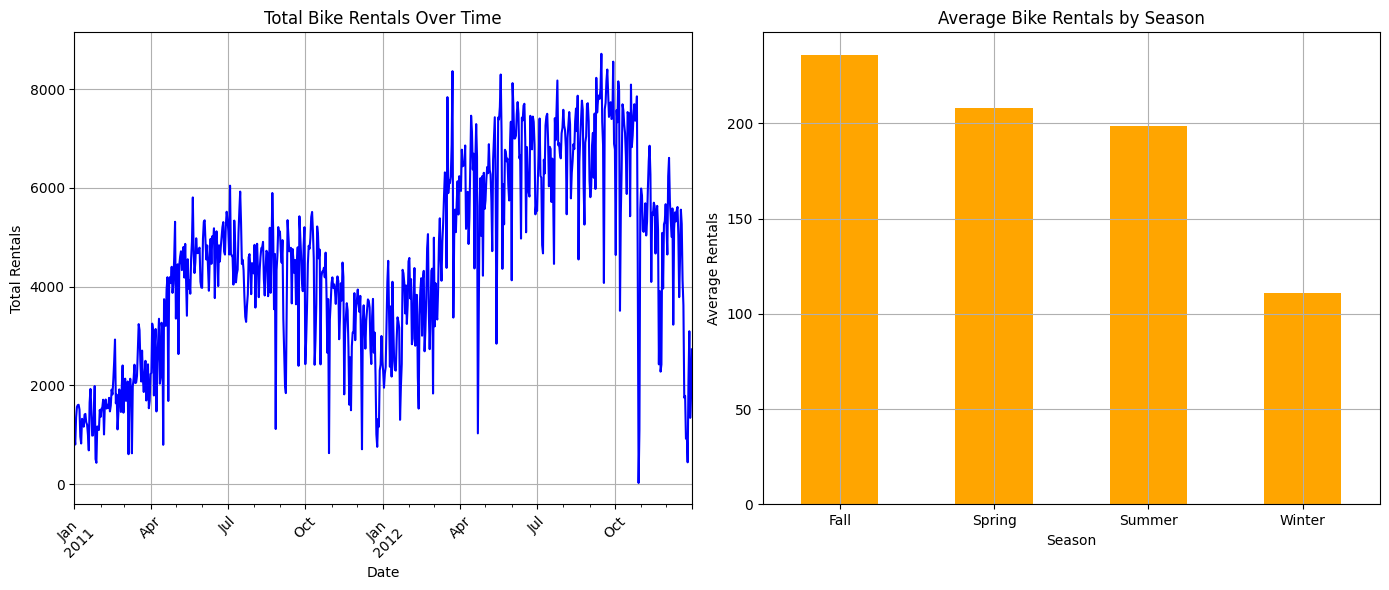

In [40]:
plt.figure(figsize=(14, 6))

# Line Chart: Total bike rentals over time
plt.subplot(1, 2, 1)
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.groupby('dteday')['cnt'].sum().plot(kind='line', color='b')
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid()

# Bar Chart: Average bike rentals by season
plt.subplot(1, 2, 2)
season_mapping = {1: 'Winter', 2: 'Spring' , 3: 'Fall', 4: 'Summer'}
df_hour['season_name'] = df_hour['season'].map(season_mapping)
average_rentals_by_season = df_hour.groupby('season_name')['cnt'].mean()
average_rentals_by_season.plot(kind='bar', color='orange')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.grid()

plt.tight_layout()
plt.show()


**Insight:**
1. **Tren Penyewaan Sepeda**: Grafik garis menunjukkan bahwa total penyewaan sepeda mengalami fluktuasi sepanjang waktu. Ada pola musiman yang jelas, dengan lonjakan penyewaan di bulan-bulan tertentu.

2. **Penyewaan Rata-rata Berdasarkan Musim**: Grafik batang mengungkapkan bahwa rata-rata penyewaan sepeda tertinggi terjadi di musim gugur, diikuti oleh musim semi, musim panas, dan terendah di musim dingin. Hal ini menunjukkan pengaruh kondisi cuaca terhadap penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

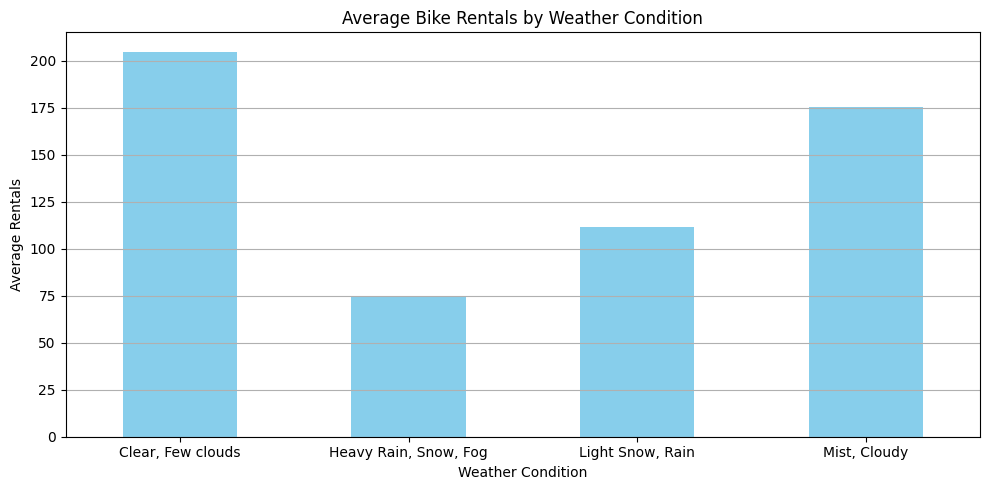

In [41]:
plt.figure(figsize=(10, 5))

# Bar Chart: Average bike rentals by weather condition
weather_mapping = {
    1: 'Clear, Few clouds',
    2: 'Mist, Cloudy',
    3: 'Light Snow, Rain',
    4: 'Heavy Rain, Snow, Fog'
}
df_hour['weather_name'] = df_hour['weathersit'].map(weather_mapping)
average_rentals_by_weather = df_hour.groupby('weather_name')['cnt'].mean()

# Plot the bar chart
average_rentals_by_weather.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


**Insight:**
1. **Pengaruh Kondisi Cuaca**: Grafik batang menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah atau sedikit berawan. Dalam kondisi ini, pengguna cenderung lebih banyak menyewa sepeda.

2. **Kondisi Cuaca Buruk**: Rata-rata penyewaan sepeda menurun signifikan selama kondisi cuaca buruk, seperti salju ringan, hujan, dan kabut, serta hujan lebat atau salju. Hal ini menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda ketika cuaca baik.

### Pertanyaan 2:

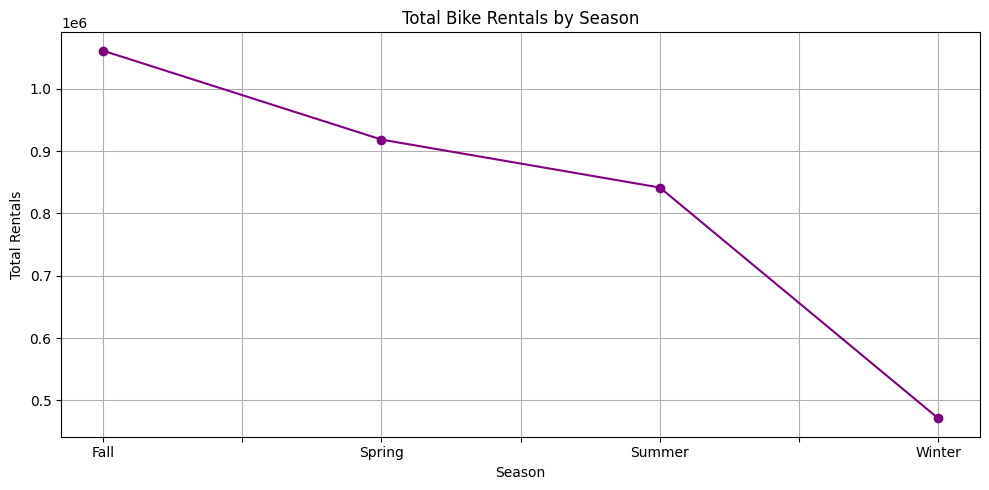

In [42]:
plt.figure(figsize=(10, 5))

# Line Chart: Total bike rentals by season
# Group by season and sum the rental counts
total_rentals_by_season = df_hour.groupby('season_name')['cnt'].sum()

# Plot the line chart
total_rentals_by_season.plot(kind='line', marker='o', color='purple')
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.grid()

plt.tight_layout()
plt.show()


**Insight:**
1. **Musiman Penyewaan**: Grafik menunjukkan bahwa penyewaan sepeda mengalami fluktuasi yang signifikan berdasarkan musim. Musim gugur memiliki total penyewaan tertinggi, menunjukkan bahwa cuaca hangat dan panjangnya hari mendorong lebih banyak orang untuk menyewa sepeda.

2. **Musim Dingin**: Musim dingin menunjukkan total penyewaan yang jauh lebih rendah, yang mungkin disebabkan oleh cuaca yang lebih dingin dan hari yang lebih pendek, yang mengurangi minat pengguna untuk bersepeda.

3. **Konsistensi di Musim Semi**: Musim semi menunjukkan total penyewaan yang moderat, yang dapat diartikan bahwa saat cuaca mulai menghangat, pengguna mulai kembali tertarik untuk menyewa sepeda.

Pertanyaan 3

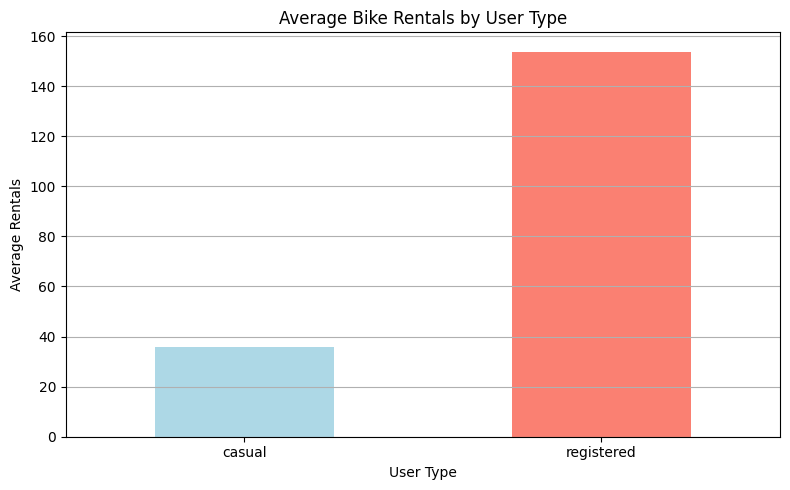

In [43]:
plt.figure(figsize=(8, 5))

# Bar Chart: Average bike rentals by user type (registered vs casual)
average_rentals_by_user_type = df_hour[['casual', 'registered']].mean()

# Plot the bar chart
average_rentals_by_user_type.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Bike Rentals by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


**Insight :**
1. **Perbandingan Penyewaan**: Grafik menunjukkan bahwa pengguna terdaftar menyewa sepeda secara signifikan lebih banyak dibandingkan pengguna kasual. Hal ini menunjukkan bahwa mereka yang terdaftar mungkin lebih sering menggunakan layanan penyewaan sepeda, mungkin karena mereka lebih nyaman atau memiliki kebutuhan yang lebih konsisten untuk bersepeda.

2. **Pengguna Kasual**: Meskipun jumlah penyewaan untuk pengguna kasual lebih rendah, hal ini tidak berarti bahwa segmen ini tidak penting. Mereka mungkin menggunakan layanan hanya pada waktu-waktu tertentu, seperti akhir pekan atau saat acara khusus.

3. **Strategi Pemasaran**: Data ini dapat memberikan wawasan penting bagi strategi pemasaran. Penyedia layanan dapat berusaha untuk menarik lebih banyak pengguna kasual melalui promosi atau penawaran khusus untuk meningkatkan jumlah penyewaan dari segmen ini.

## Analisis Lanjutan (Opsional)

##Cluster Berdasarkan Cuaca

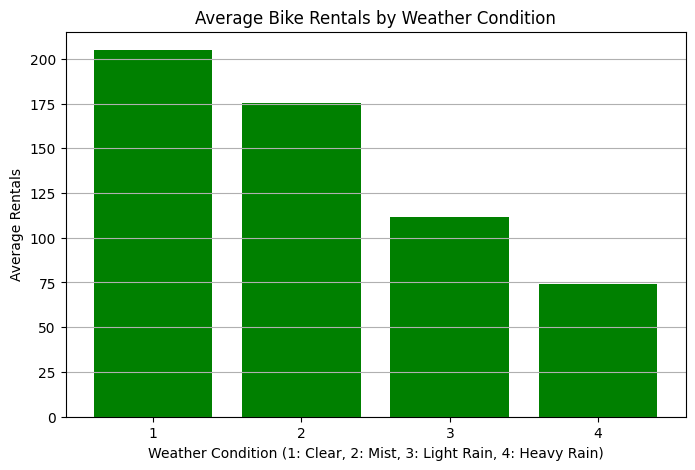

In [44]:
cluster_weather_data = df_hour.groupby(['weathersit'])['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(cluster_weather_data['weathersit'].astype(str), cluster_weather_data['cnt'], color='green')
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain)')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


**Insight :**
1. **Pengaruh Cuaca terhadap Penyewaan**: Grafik menunjukkan bahwa cuaca yang lebih baik (kategori 1: Clear, Few clouds) berkontribusi pada rata-rata penyewaan sepeda yang lebih tinggi. Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda pada hari-hari cerah, mungkin karena lebih nyaman dan menyenangkan untuk bersepeda.

2. **Penurunan Penyewaan pada Cuaca Buruk**: Rata-rata penyewaan sepeda untuk kondisi cuaca yang lebih buruk (kategori 3 dan 4: Light Snow, Rain dan Heavy Rain, Snow, Fog) menunjukkan angka yang jauh lebih rendah. Ini mengindikasikan bahwa hujan atau salju mengurangi minat orang untuk menggunakan sepeda, sehingga penting bagi penyedia layanan untuk memahami faktor cuaca dalam perencanaan dan promosi mereka.

3. **Strategi Penyesuaian**: Penyedia layanan dapat menggunakan informasi ini untuk mengembangkan strategi, seperti memberikan diskon atau promosi pada hari-hari yang cenderung memiliki cuaca baik, atau bahkan menyesuaikan penawaran pada hari-hari hujan untuk menarik pengguna yang mungkin masih ingin menggunakan sepeda meskipun dalam kondisi cuaca yang kurang ideal.

##RFM Analysis

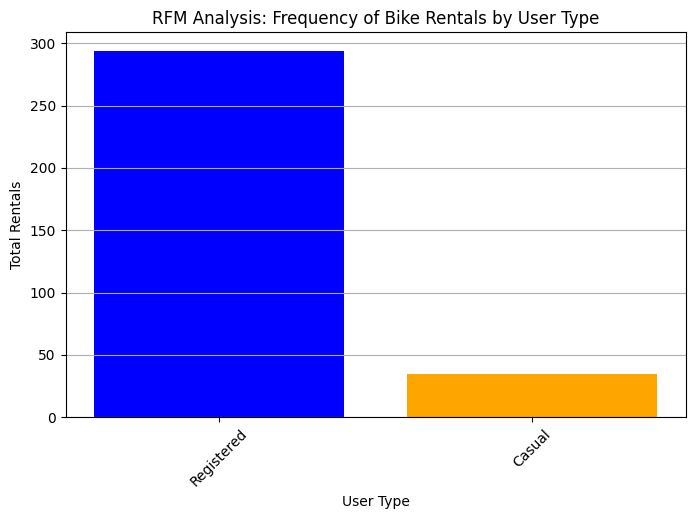

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

data_rfm = {
    'User Type': ['Registered', 'Casual'],
    'Frequency': [df_hour[df_hour['registered'] == 1]['cnt'].sum(), df_hour[df_hour['registered'] == 0]['cnt'].sum()]
}
df_rfm = pd.DataFrame(data_rfm)

plt.figure(figsize=(8, 5))
plt.bar(df_rfm['User Type'], df_rfm['Frequency'], color=['blue', 'orange'])
plt.title('RFM Analysis: Frequency of Bike Rentals by User Type')
plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


**Insight :**
1. **Frekuensi Penyewaan berdasarkan Tipe Pengguna**: Grafik menunjukkan perbedaan yang signifikan dalam frekuensi penyewaan antara pengguna terdaftar dan pengguna kasual. Pengguna terdaftar memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar lebih cenderung untuk menyewa sepeda secara reguler, mungkin karena mereka memiliki lebih banyak insentif untuk melakukannya, seperti biaya yang lebih rendah atau akses yang lebih mudah.

2. **Potensi untuk Meningkatkan Penggunaan Kasual**: Meskipun pengguna terdaftar menunjukkan frekuensi yang lebih tinggi, penting untuk mengidentifikasi cara untuk meningkatkan keterlibatan pengguna kasual. Strategi pemasaran yang menargetkan pengguna kasual, seperti promosi khusus atau program loyalitas, dapat membantu meningkatkan frekuensi penyewaan mereka.

3. **Analisis Lanjutan**: Memahami perilaku penyewaan dari kedua kelompok pengguna dapat membantu dalam pengambilan keputusan untuk pengembangan produk dan strategi pemasaran. Dengan meningkatkan pengalaman pengguna kasual, perusahaan dapat mengonversi mereka menjadi pengguna terdaftar, yang pada gilirannya dapat meningkatkan total penyewaan sepeda dan pendapatan.

## Conclusion

###Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda
Analisis menunjukkan bahwa kondisi cuaca memiliki dampak signifikan terhadap penyewaan sepeda. Penyewaan tertinggi terjadi pada hari-hari cerah, sedangkan penyewaan menurun drastis saat cuaca buruk. Ini menegaskan pentingnya mempertimbangkan kondisi cuaca dalam merancang strategi pemasaran dan promosi penyewaan sepeda.

###Pertanyaan 2: Musiman Penyewaan Sepeda
Grafik menunjukkan fluktuasi penyewaan sepeda yang jelas berdasarkan musim. Musim gugur tercatat sebagai musim dengan penyewaan tertinggi, sementara musim dingin menunjukkan angka terendah. Ini menunjukkan bahwa strategi pemasaran perlu disesuaikan dengan perubahan musiman untuk memaksimalkan penyewaan.

###Pertanyaan 3: Perbandingan Penyewaan berdasarkan Tipe Pengguna
Pengguna terdaftar menyewa sepeda jauh lebih banyak dibandingkan pengguna kasual, yang menunjukkan bahwa mereka mungkin lebih loyal dan memiliki kebutuhan yang lebih konsisten untuk bersepeda. Meskipun jumlah penyewaan pengguna kasual lebih rendah, segmen ini tetap penting, dan perlu ada strategi untuk menarik mereka melalui promosi dan penawaran khusus.
